In [2]:
#%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from eqs2s import GeoDistance
from eqs2s import EQDistances
#!python3 -m pip install xlrd --user -U

WD = os.getcwd()
print(WD)

/home/silvio/Dokumente/GitHub/Statistical Seismology/Earthquake-Source-to-Site-Metrics/test/data/usa


In [3]:
os.listdir()

['eqs2s.py', 'eqint_tsqp.xlsx', '__pycache__', 'USA.ipynb']

In [4]:
path = "eqint_tsqp.xlsx"
catalog = pd.read_excel(path)
catalog.head()

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LOCAL_TO_UTC,UNPUB_OR_GROUPED_INT,LATITUDE,LONGITUDE,MAGNITUDE,EQ_DEPTH,EPIDIST,CITY_LAT,CITY_LON,MMI,STATE,CITY,SOURCE,COUNTRY
0,1852,11.0,27.0,NaN,NaN,NaN,8.0,NaN,34.5,-119.0,NaN,NaN,0.0,34.50,-119.00,7.0,CA,LOCKWOOD VALLEY,H,USA
1,1852,11.0,27.0,NaN,NaN,NaN,8.0,NaN,34.5,-119.0,NaN,NaN,258.0,33.02,-116.84,6.0,CA,SAN DIEGO,H,USA
2,1852,11.0,27.0,NaN,NaN,NaN,8.0,NaN,34.5,-119.0,NaN,NaN,159.0,35.35,-120.41,6.0,CA,SAN LUIS OBISPO,H,USA
3,1852,11.0,27.0,NaN,NaN,NaN,8.0,NaN,34.5,-119.0,NaN,NaN,NaN,NaN,NaN,6.0,CA,COLORADO RIVER,H,USA
4,1860,11.0,12.0,NaN,NaN,NaN,8.0,NaN,41.0,-124.0,NaN,NaN,32.0,40.76,-124.22,8.0,CA,HUMBOLDT BAY,H,USA


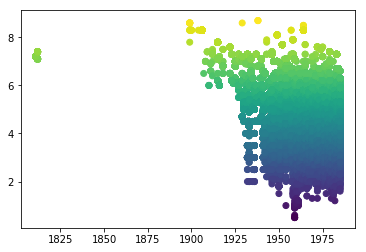

In [7]:
plt.scatter(catalog["YEAR"],catalog["MAGNITUDE"], c=catalog["MAGNITUDE"])

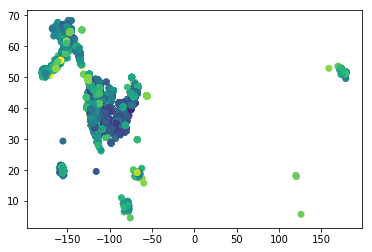

In [8]:
plt.scatter(catalog["LONGITUDE"],catalog["LATITUDE"], c=catalog["MAGNITUDE"])

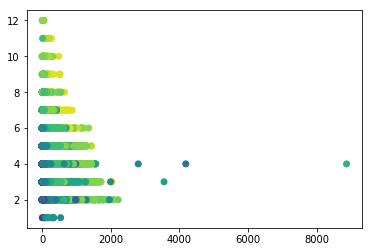

In [6]:
plt.scatter(catalog["EPIDIST"],catalog["MMI"], c=catalog["MAGNITUDE"])

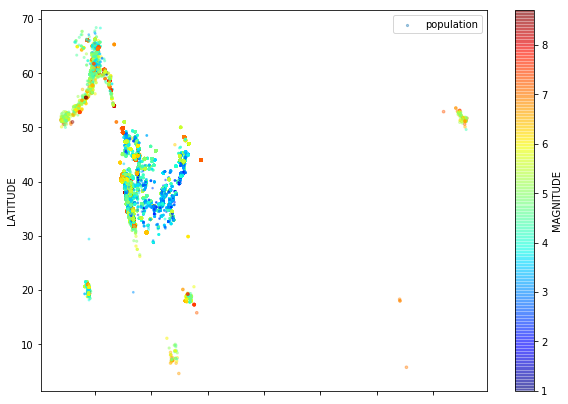

In [14]:
catalog.plot(kind="scatter", 
             x="LONGITUDE", y="LATITUDE", 
             alpha=0.4,
             s=catalog['MAGNITUDE'], 
             label="population",
             c="MAGNITUDE", 
             cmap=plt.get_cmap("jet"),
             colorbar=True, figsize=(10,7),)

plt.show()

In [20]:
from mpl_toolkits.basemap import Basemap

# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(catalog['LONGITUDE'], catalog['LATITUDE'], latlon=True,
          c=catalog['MAGNITUDE'], s=catalog['MAGNITUDE'],
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [22]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()


ModuleNotFoundError: No module named 'cartopy'